# Finding nonlinear solutions

In [1]:
import numpy as np
from scipy.optimize import fsolve

def pack(Etam,Bj,Ub,Q,R): # bind into one vector A
    N=len(Bj)
    A=np.zeros(2*N+4)
    A[:N+1]=Etam
    A[N+1:2*N+1]=Bj
    A[2*N+1:]=Ub,Q,R
    return A

def unpack(A):
    N=len(A)//2-2
    return A[:N+1],A[N+1:2*N+1],*A[2*N+1:] # split A into Etam,Bj,Ub,Q,R

In [2]:
def nwfourier(N,H,d=0): # defaults to d=0 representing deep water
    
    def F(A): # set of conditions on boundaries
        Etam,Bj,Ub,Q,R=unpack(A)
        Etamj=Etam.reshape((N+1,1))@j.reshape((1,N))
        CEmj,SEmj=C(Etamj),S(Etamj)
        kin=-Ub*Etam+((SEmj*CXmj))@(Bj/Chjd)+Q
        Um=-Ub+((CEmj*CXmj))@(j*Bj/Chjd)
        Vm=((SEmj*SXmj))@(j*Bj/Chjd)
        dyn=(Um**2+Vm**2)/2+Etam-R
        height=Etam[0]-Etam[-1]
        depth=((Etam[0]+Etam[-1])/2+sum(Etam[1:-1]))/N
        return np.hstack([kin,dyn,height-H,depth-d])

    Bj0=np.zeros(N)
    Ub0=1 if d==0 else np.tanh(d)**(1/2)
    Bj0[0]=H/2/Ub0
    Q0,R0=Ub0*d,Ub0**2/2+d
    Xm=np.linspace(0,np.pi,N+1)
    Etam0=d+H*np.cos(Xm)/2
    
    A0=pack(Etam0,Bj0,Ub0,Q0,R0)

    j=np.arange(1,N+1)
    Xmj=Xm.reshape((N+1,1))@j.reshape((1,N))
    CXmj,SXmj,Chjd=np.cos(Xmj),np.sin(Xmj),np.cosh(j*d)
    C,S=(np.exp,np.exp) if d==0 else (np.cosh,np.sinh)
    return unpack(fsolve(F,A0))

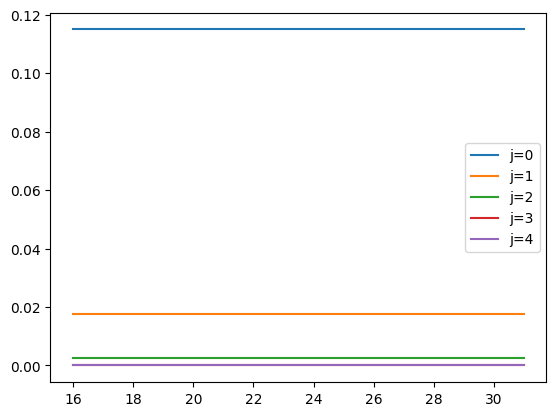

In [4]:
import matplotlib.pyplot as plt
for j in range(5):
    NV=np.array([(N,nwfourier(N,0.1945,0.6484)[1][j]) for N in range(16,32)])
    
    plt.plot(NV.T[0],NV.T[1],label=f'j={j}')
plt.legend()

0.09677646493994374


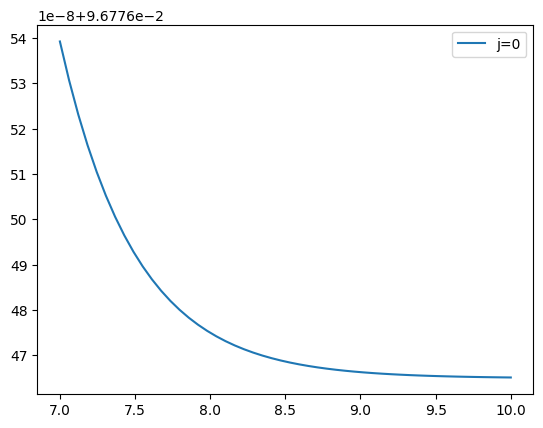

In [7]:
j=0

NV=np.array([(d,nwfourier(16,0.1945,d)[1][j]) for d in np.linspace(7,10)])

print(nwfourier(16,0.1945)[1][j])
plt.plot(NV.T[0],NV.T[1],label=f'j={j}')
plt.legend()